# HR Analytics Project- Understanding the Attrition in HR

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('C:/Users/Dazzle/Desktop/DataTrained/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Dataset is having numeric and categorical columns, target is also categorical. Hence we can consider this problem as of binary classification.

### Project Description

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Target column is categorical hence it is a binary classification problem.

In [3]:
# Checking columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Columns names are displayed where 'Attrition' is the target variable and all other are independent variables.

In [4]:
# Checking datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here, we can see columns are of type object and integer i.e. both categorical and numeric columns are there.

In [5]:
#Checking the dataset shape
df.shape

(1470, 35)

Dataset is having 1470 rows and 35 columns (34 input features and 1 output feature).

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

It gives additional information regardng the dataset like RangeIndex, Data columns, datatypes. We can see there is no null values in the dataset.

### Data Preprocessing

In [7]:
# Checking which all columns are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Age
Unique values :  43
Value counts  :  35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------------------
Attrition
Unique values :  2
Value counts  :  No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------
BusinessTravel
Unique values :  3
Value counts  :  Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------
DailyRate
Unique values :  886
Value counts  :  691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64
--------------

We can see, 'EmployeeCount' has value 1 in all 1470 rows.

'EmployeeNumber' has different unique values in all 1470 rows.

'Over18' has just a single value 'Y' in all 1470 records.

'StandardHours' has a single value i.e. '80' in all the 1470 rows.

Since these columns could not give any significant contribution to the model performance, we can drop these columns for better analysis.

In [8]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


Now, there are 1470 rows and 31 columns after irrelevant columns removal.

In [9]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat_obj=df.select_dtypes(include='object')
df_cat_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [10]:
# Numeric/Continuous data
df_con_num=df.select_dtypes(exclude='object')
for i in df_con_num.columns :
    print(i,' : ',df_con_num[i].nunique())
    print(df_con_num[i].unique())

Age  :  43
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
DailyRate  :  886
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  7

Age, Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, NumCompaniesWorked, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance columns are ordinal hence we can remove these from continuous dataset.

In [11]:
df_con=df_con_num.drop(['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance'],axis=1)
df_con

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,1,94,5993,19479,11,8,6,4,0,5
1,279,8,61,5130,24907,23,10,10,7,1,7
2,1373,2,92,2090,2396,15,7,0,0,0,0
3,1392,3,56,2909,23159,11,8,8,7,3,0
4,591,2,40,3468,16632,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,41,2571,12290,17,17,5,2,0,3
1466,613,6,42,9991,21457,15,9,7,7,1,7
1467,155,4,87,6142,5174,20,6,6,2,0,3
1468,1023,2,63,5390,13243,14,17,9,6,0,8


There are 1470 rows and 11 columns of continuous data.

In [12]:
df_cat_num=df[['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']]
df_cat_num

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,2,2,3,2,4,8,3,1,0,0,1
1,49,1,3,2,2,2,1,4,4,1,3,3
2,37,2,4,2,1,3,6,3,2,0,3,3
3,33,4,4,3,1,3,1,3,3,0,3,3
4,27,1,1,3,1,2,9,3,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,3,4,2,4,4,3,3,1,3,3
1466,39,1,4,2,3,1,4,3,1,1,5,3
1467,27,3,2,4,2,2,1,4,2,1,0,3
1468,49,3,4,2,2,2,2,3,4,0,3,2


Now, we can apply EDA on these datasets columns.

### EDA and Visualisatons

In [13]:
# Checking target values
print(df['Attrition'].unique())
print(df['Attrition'].nunique())

['Yes' 'No']
2


There are total 2 unique values in target variable

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Here, classes are having huge difference in value counts hence, class imbalance issue exists.

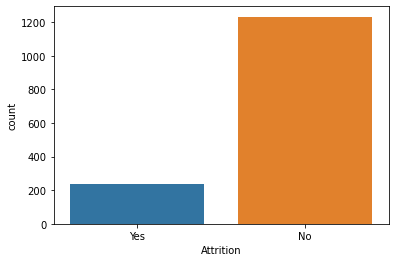

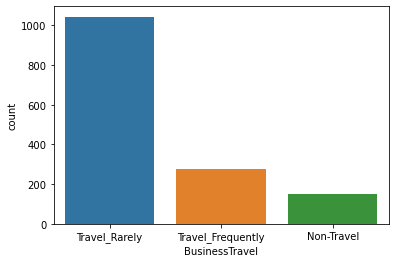

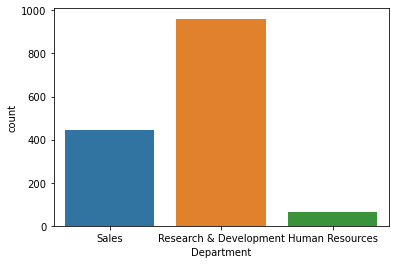

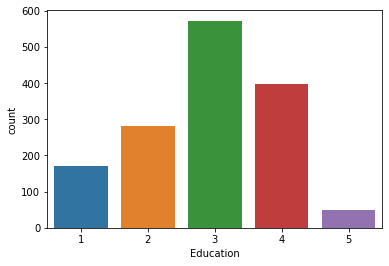

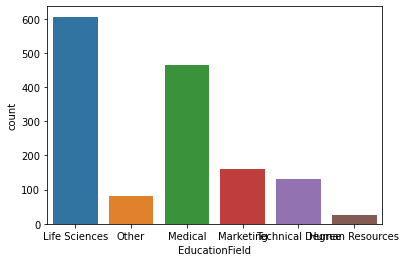

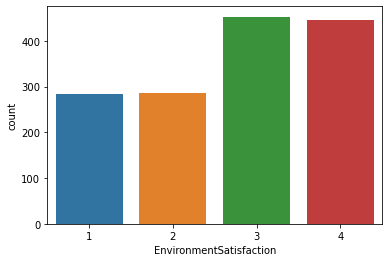

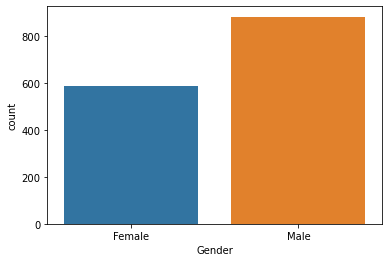

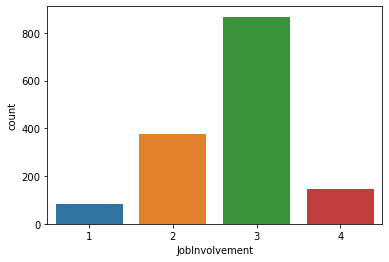

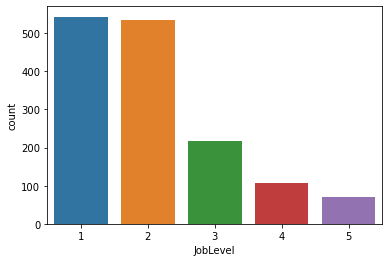

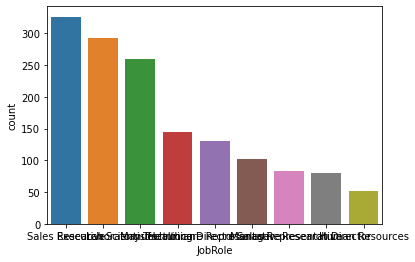

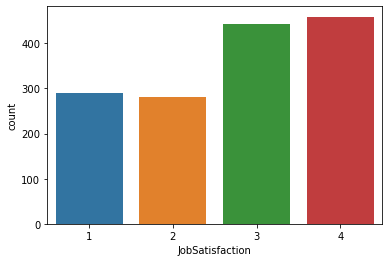

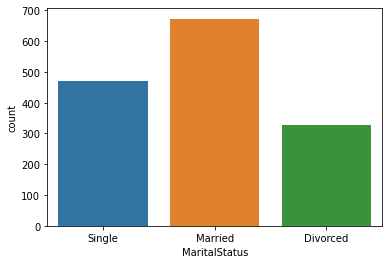

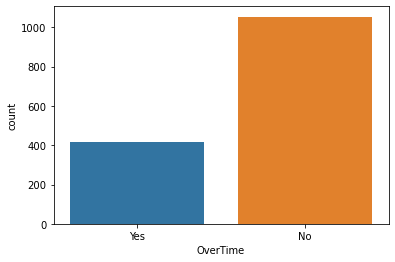

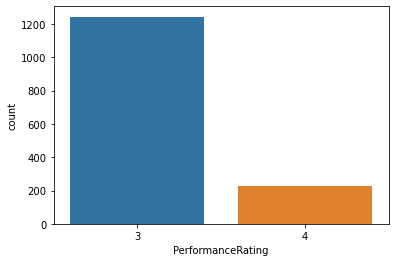

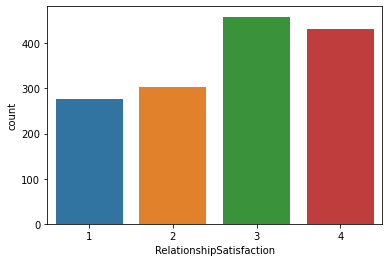

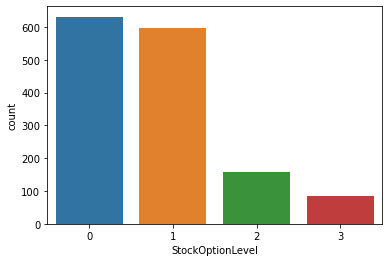

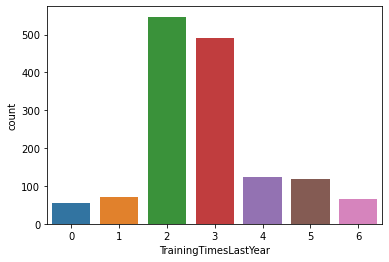

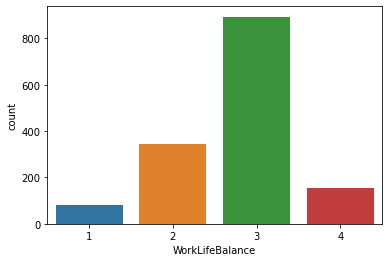

In [15]:
# Visualizing value counts of all the columns
#plt.figure(figsize=(10,8))
for i in df.columns :
    if (df[i].nunique()<10) :
        sns.countplot(df[i])
        plt.show()

Plot depicting, high number of employees are of age 29-40. There is huge difference between Yes and No value counts of Attrition. Most of the employees travel rarely. Good number of employees are from R&D department. High number of people are staying near the company i.e. DistanceFrom Home is less. Most employees are with Education level 3. After Lfe Sciences, Medical s the mostly preferred EducationField and Resources is least preferred. 3,4 have high EnvironmentSatisfaction. Male employees are more in the company than female eployees. 3 has highest Jobnvolvement. There is a good count of 1&2 JobLevel i.e. 500+. 3&4 have more Job Satisfaction than 1&2. Married employees are in majority. A high number of employees have worked in just 1 company. Comparatively, less number of employees do OverTime. Mostly, PercentSalaryHike is from 11-14%. PerformanceRating 3 is given mostly than 4. Stock option level is high for 0&1. There are 200+ employee count having TotalWorkingYears as 10. Number 3 has a good WorkLifeBalance. Approx 200 employees have completed 5 years in the same company. Majority in YearsInCurrentRole is 2. Majority in YearsInCurrManager is also 2. 

In [16]:
# Checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

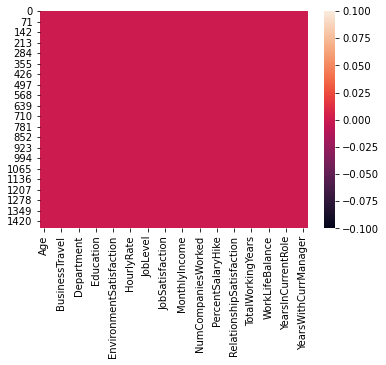

In [17]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset

In [18]:
# Describe dataset
df_con.describe()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


There are high standard deviation in columns : DailyRate,EmployeeNumber,HourlyRate.

Data is having slight skewness in columns : DistanceFromHome,EmployeeNumber,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

Difference in 75% and max value is high in columns : TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager. So, outliers could be there.

In [19]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df_con))
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([10,  9,  7,  9,  8,  9,  6,  6,  7,  9,  8,  9, 10,  6,  7,  9, 10,
         9,  6, 10,  7,  8,  9,  8, 10,  7,  9,  6,  7,  8,  9,  9, 10,  6,
         7,  7,  9,  9,  6,  8,  7,  7,  9,  7, 10,  9,  7,  6,  7,  9, 10,
         6

In [20]:
# Checking the outlier in the dataset
z[28][10]

3.6100788863016295

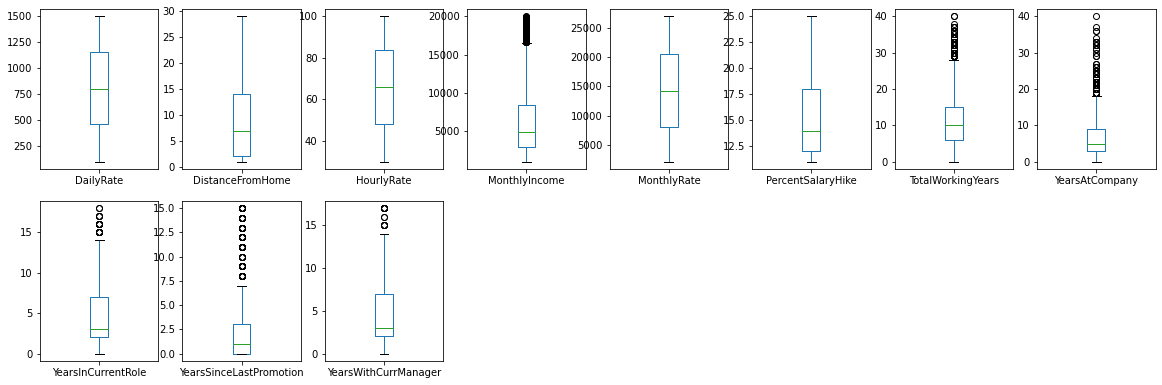

In [21]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [22]:
# Checking skewness
df_con.skew()

DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

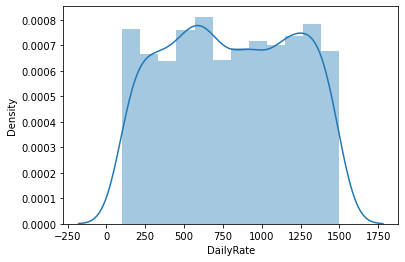

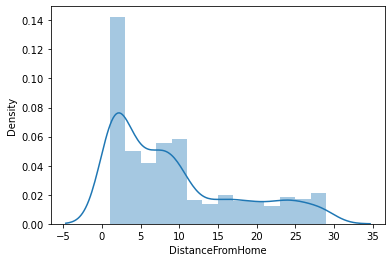

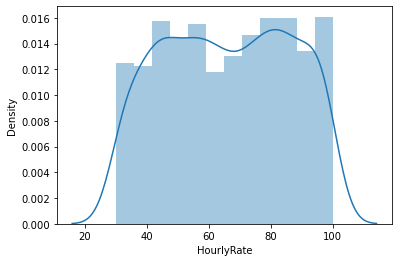

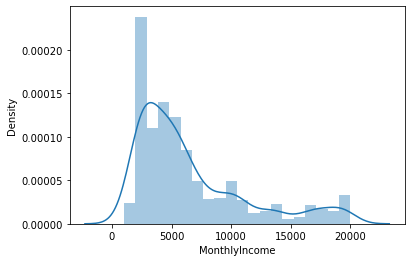

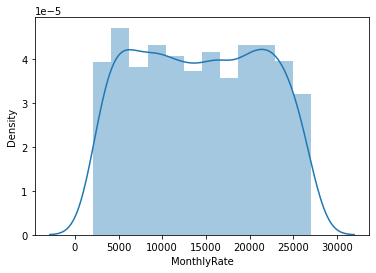

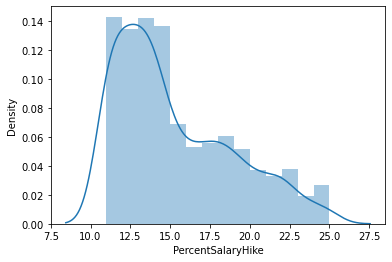

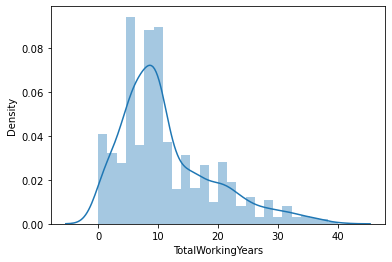

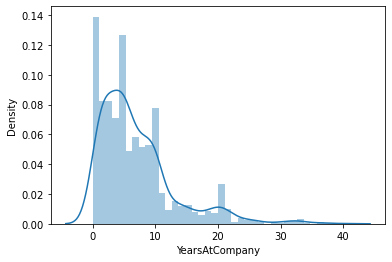

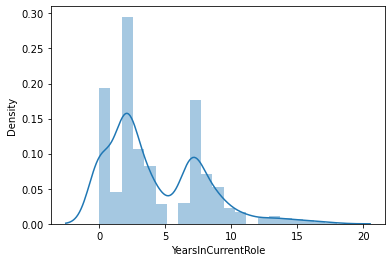

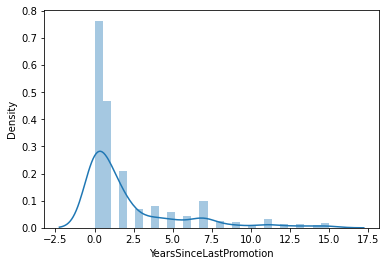

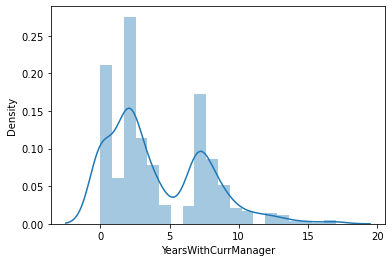

In [23]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in columns : DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

### Data Cleaning

In [24]:
# Removing outliers

df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,1,94,5993,19479,11,8,6,4,0,5
1,279,8,61,5130,24907,23,10,10,7,1,7
2,1373,2,92,2090,2396,15,7,0,0,0,0
3,1392,3,56,2909,23159,11,8,8,7,3,0
4,591,2,40,3468,16632,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,41,2571,12290,17,17,5,2,0,3
1466,613,6,42,9991,21457,15,9,7,7,1,7
1467,155,4,87,6142,5174,20,6,6,2,0,3
1468,1023,2,63,5390,13243,14,17,9,6,0,8


In [25]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (1470, 11)
Shape of dataset after removing outliers :  (1387, 11)


In [26]:
# Percentage Data lost
data_percent=(1470-1387)/1470 * 100
data_percent

5.646258503401361

Approx 6% data is lost after removing the outliers.

In [27]:
# Checking skewness after removing outliers
df1.skew()

DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

We can see skewness is present in the columns : DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

But since below columns have 0 values in it we can't apply transformation on these as it will return NaN. TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

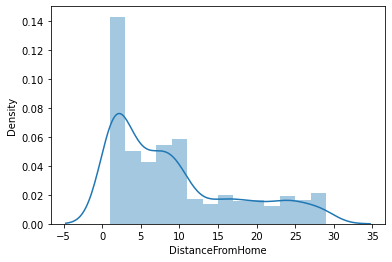

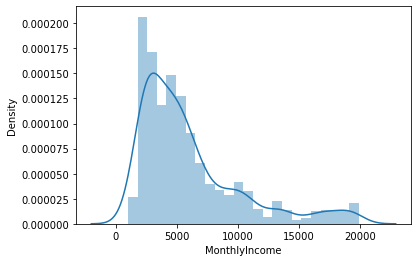

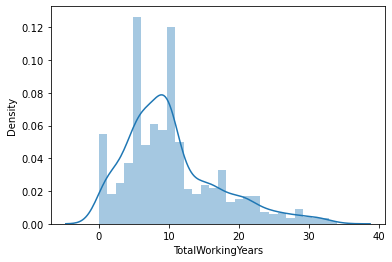

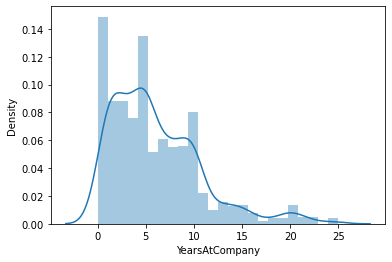

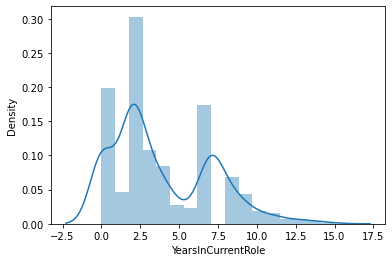

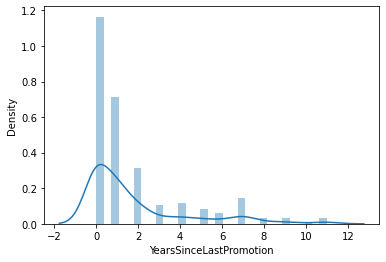

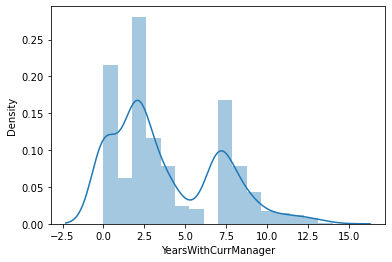

In [28]:
# Visualizng skewness
df2=df1.copy()
skew_list1=['DistanceFromHome','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in skew_list1 :
    sns.distplot(df2[i])
    plt.show()

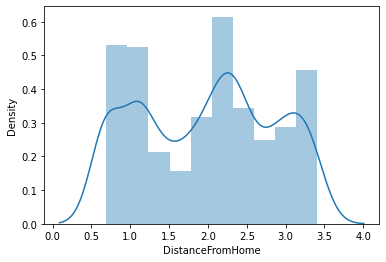

-0.031569926095474654


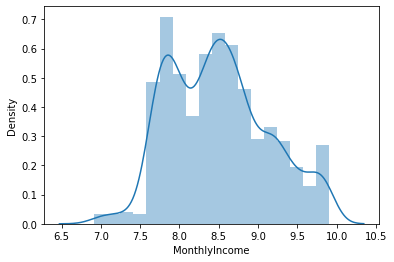

0.31887298803684655


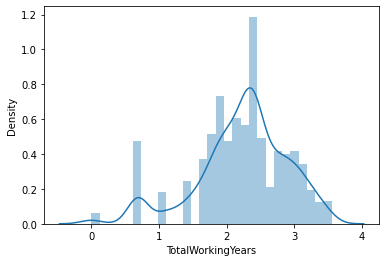

-0.7283476986689463


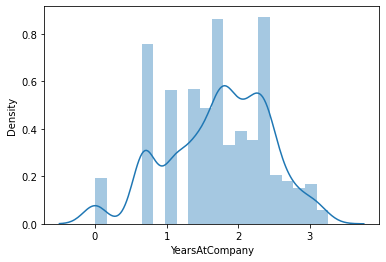

-0.37952718129109286


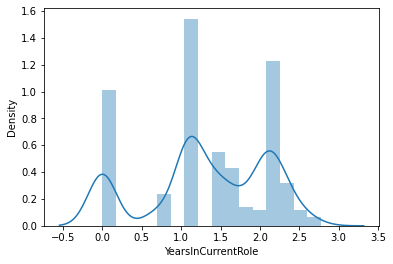

-0.39040618784753434


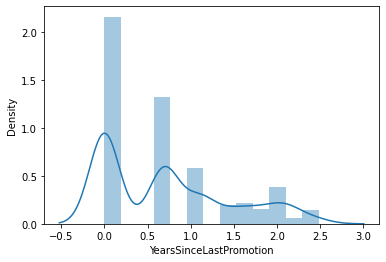

0.6953478735711569


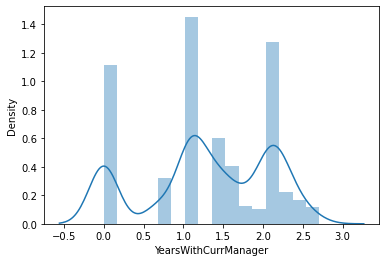

-0.347018212640982


In [29]:
# Removing skewness
for i in skew_list1 :
    df2[i]=np.log(df1[i]+1)
    sns.distplot(df2[i])
    plt.show()
    print(df2[i].skew())

In [30]:
df2.skew()

DailyRate                 -0.017078
DistanceFromHome          -0.031570
HourlyRate                -0.030481
MonthlyIncome              0.318873
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears         -0.728348
YearsAtCompany            -0.379527
YearsInCurrentRole        -0.390406
YearsSinceLastPromotion    0.695348
YearsWithCurrManager      -0.347018
dtype: float64

Except for PercentSalaryHike,TotalWorkingYears,YearsSinceLastPromotion columns all other columns' skewness is removed. So we can again apply transformation on these columns again to remove skewness.

In [31]:
from scipy.stats import boxcox,yeojohnson
df2['PercentSalaryHike']=yeojohnson(df2['PercentSalaryHike'],0)
df2['PercentSalaryHike'].skew()

0.4961064195249028

In [32]:
from scipy.stats import boxcox,yeojohnson
df3=df2.copy()
df3['TotalWorkingYears']=np.log(df2['TotalWorkingYears']+1)
df3['TotalWorkingYears'].skew()

-1.6672939818861734

In [33]:
from scipy.stats import boxcox,yeojohnson
df2['YearsSinceLastPromotion']=yeojohnson(df2['YearsSinceLastPromotion'],0)
df2['YearsSinceLastPromotion'].skew()

0.24888275092310105

Removed skewness from all columns but in TotalWorkingYears skewness is increasing on further applying any transformations hence we can take its skewness threshold as 0.7 itself that is in dataset df2.

In [34]:
df2

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1102,0.693147,94,8.698514,19479,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759
1,279,2.197225,61,8.543056,24907,3.178054,2.397895,2.397895,2.079442,0.526589,2.079442
2,1373,1.098612,92,7.645398,2396,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000
3,1392,1.386294,56,7.975908,23159,2.484907,2.197225,2.197225,2.079442,0.869742,0.000000
4,591,1.098612,40,8.151622,16632,2.564949,1.945910,1.098612,1.098612,0.741276,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
1465,884,3.178054,41,7.852439,12290,2.890372,2.890372,1.791759,1.098612,0.000000,1.386294
1466,613,1.945910,42,9.209540,21457,2.772589,2.302585,2.079442,2.079442,0.526589,2.079442
1467,155,1.609438,87,8.723069,5174,3.044522,1.945910,1.945910,1.098612,0.000000,1.386294
1468,1023,1.098612,63,8.592486,13243,2.708050,2.890372,2.302585,1.945910,0.000000,2.197225


### Apply encoding on categorical columns

In [35]:
for i in df_cat_obj.columns :
    print(i)
    print(df_cat_obj[i].unique())

Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
OverTime
['Yes' 'No']


Attrition, Gender and OverTime are having binary data. Business travel and Marital status is having ordinal data. Hence, we can apply Label encoding on all of these columns.

In [36]:
df_cat_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [37]:
from sklearn.preprocessing import LabelEncoder
df_cat=df_cat_obj.copy()
le=LabelEncoder()
for i in df_cat_obj.columns :
    df_cat[i]=le.fit_transform(df_cat_obj[i])
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


Categorical columns with object datatypes are now encoded having 1470 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [38]:
dff=pd.concat([df_cat,df_cat_num,df2],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
OverTime                    0
Age                         0
Education                   0
EnvironmentSatisfaction     0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
DailyRate                   0
DistanceFromHome            0
HourlyRate                  0
MonthlyIncome               0
MonthlyRate                 0
PercentSalaryHike           0
TotalWorkingYears           0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [39]:
dff.shape

(1387, 31)

In [40]:
dff

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,Education,...,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,1,41,2,...,0.693147,94.0,8.698514,19479.0,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759
1,0,1,1,1,1,6,1,0,49,1,...,2.197225,61.0,8.543056,24907.0,3.178054,2.397895,2.397895,2.079442,0.526589,2.079442
2,1,2,1,4,1,2,2,1,37,2,...,1.098612,92.0,7.645398,2396.0,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000
3,0,1,1,1,0,6,1,1,33,4,...,1.386294,56.0,7.975908,23159.0,2.484907,2.197225,2.197225,2.079442,0.869742,0.000000
4,0,2,1,3,1,2,1,0,27,1,...,1.098612,40.0,8.151622,16632.0,2.564949,1.945910,1.098612,1.098612,0.741276,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,36,2,...,3.178054,41.0,7.852439,12290.0,2.890372,2.890372,1.791759,1.098612,0.000000,1.386294
1466,0,2,1,3,1,0,1,0,39,1,...,1.945910,42.0,9.209540,21457.0,2.772589,2.302585,2.079442,2.079442,0.526589,2.079442
1467,0,2,1,1,1,4,1,1,27,3,...,1.609438,87.0,8.723069,5174.0,3.044522,1.945910,1.945910,1.098612,0.000000,1.386294
1468,0,1,2,3,1,7,1,0,49,3,...,1.098612,63.0,8.592486,13243.0,2.708050,2.890372,2.302585,1.945910,0.000000,2.197225


### EDA and Visualizatons

In [41]:
dff.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,Education,...,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.165105,1.604182,1.260995,2.256669,0.602019,4.501802,1.103100,0.284787,36.258111,2.896179,...,1.979759,65.847152,8.496378,14304.392213,2.762424,2.232282,1.736098,1.321594,0.448979,1.296546
std,0.371409,0.667584,0.526032,1.336205,0.489658,2.480624,0.728841,0.451476,8.838767,1.023198,...,0.856859,20.280564,0.631050,7045.812335,0.212931,0.668087,0.704912,0.772876,0.420966,0.788029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,...,0.693147,30.000000,6.917706,2097.000000,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,30.000000,2.000000,...,1.098612,48.000000,7.954547,8222.500000,2.564949,1.945910,1.386294,1.098612,0.000000,1.098612
50%,0.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.000000,35.000000,3.000000,...,2.079442,66.000000,8.463792,14199.000000,2.708050,2.302585,1.791759,1.386294,0.526589,1.386294
75%,0.000000,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000,42.000000,4.000000,...,2.708050,83.000000,8.899184,20425.500000,2.944439,2.639057,2.302585,2.079442,0.741276,2.079442
max,1.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,60.000000,5.000000,...,3.401197,100.000000,9.900684,26999.000000,3.258097,3.555348,3.258097,2.772589,1.248441,2.708050


In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is high only for few columns, rest all details seem good.

In [42]:
# Checking correlation
dff.corr()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,Education,...,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.001041,0.063637,0.023585,0.036252,0.064283,0.160960,0.257237,-0.159366,-0.032703,...,0.080806,-0.001532,-0.199616,0.014888,-0.011173,-0.237416,-0.209050,-0.190675,-0.050539,-0.194190
BusinessTravel,-0.001041,1.000000,-0.003521,0.022576,-0.025364,0.000213,0.018687,0.022378,0.022340,-0.010560,...,-0.014534,0.025424,0.029115,-0.010307,-0.025005,0.034985,-0.017311,-0.032678,-0.027575,-0.028747
Department,0.063637,-0.003521,1.000000,0.013432,-0.030618,0.678627,0.052086,0.014908,-0.038242,0.012846,...,0.037993,-0.002412,0.143283,0.022741,-0.019544,-0.003168,0.022132,0.053122,0.019091,0.019909
EducationField,0.023585,0.022576,0.013432,1.000000,0.010676,0.017492,0.012073,0.007912,-0.032676,-0.038017,...,0.012077,-0.006539,-0.033142,-0.023384,-0.007077,-0.003589,0.006682,0.008284,0.020533,0.029738
Gender,0.036252,-0.025364,-0.030618,0.010676,1.000000,-0.036831,-0.056786,-0.051558,-0.039430,-0.019166,...,0.010818,0.004768,-0.051616,-0.045850,0.007587,-0.042686,-0.045626,-0.029031,-0.016662,-0.025210
JobRole,0.064283,0.000213,0.678627,0.017492,-0.036831,1.000000,0.063149,0.043027,-0.112957,0.015140,...,0.009620,-0.024404,-0.063609,0.002271,0.004525,-0.128530,-0.038628,0.012116,0.000299,-0.015245
MaritalStatus,0.160960,0.018687,0.052086,0.012073,-0.056786,0.063149,1.000000,-0.014745,-0.104372,-0.012726,...,-0.027302,-0.007768,-0.075327,0.029546,0.012926,-0.104983,-0.073320,-0.053920,-0.008368,-0.051268
OverTime,0.257237,0.022378,0.014908,0.007912,-0.051558,0.043027,-0.014745,1.000000,0.034180,-0.017166,...,0.036710,-0.004304,0.013659,0.005552,-0.005756,0.005047,-0.032374,-0.033403,-0.010723,-0.030158
Age,-0.159366,0.022340,-0.038242,-0.032676,-0.039430,-0.112957,-0.104372,0.034180,1.000000,0.198502,...,-0.029146,0.025465,0.442414,0.026954,0.009357,0.614276,0.171712,0.114690,0.104232,0.110766
Education,-0.032703,-0.010560,0.012846,-0.038017,-0.019166,0.015140,-0.012726,-0.017166,0.198502,1.000000,...,0.003558,0.010848,0.105739,-0.018540,-0.007524,0.162086,0.038117,0.047845,0.016819,0.024326


<AxesSubplot:>

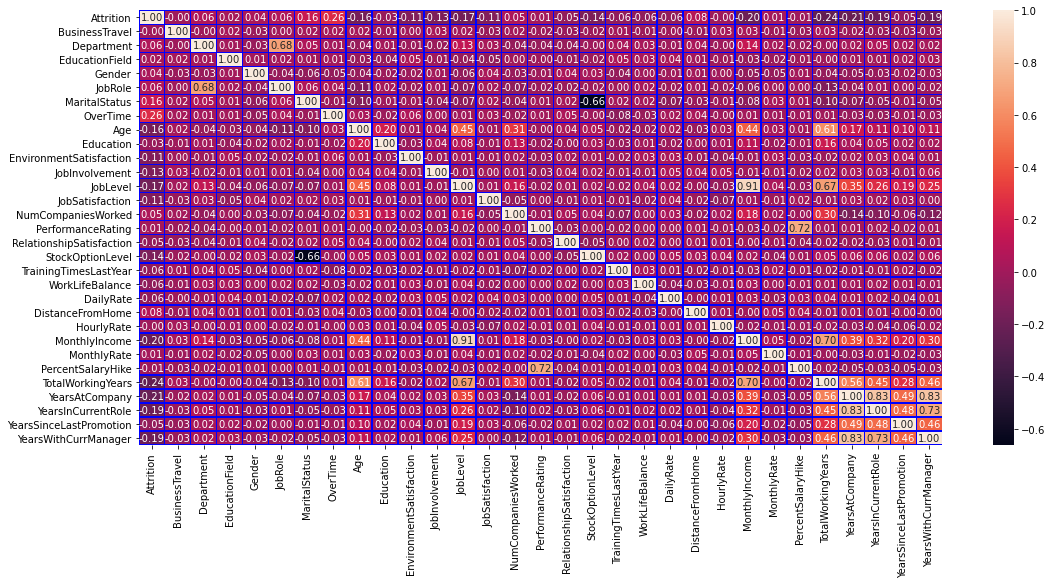

In [43]:
# Visualizing correlation
plt.figure(figsize=(18,8))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

No feature has a good correlation with target column. Department has good correlation with JobRole. MaritalStatus is highly negatively correlated with StockOptionLevel & RelationshpSatisfaction. Age has good correlation with MonthlyIncome, TotalWorkingYears, NumCompanesWorked and JobLevel.

Multicollinearity may exists.

<AxesSubplot:xlabel='JobInvolvement', ylabel='TotalWorkingYears'>

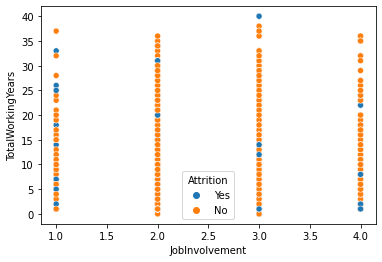

In [44]:
sns.scatterplot(df['JobInvolvement'],df['TotalWorkingYears'],hue=df['Attrition'])

Least job involvement employees are attrited more.

<AxesSubplot:xlabel='MaritalStatus', ylabel='StockOptionLevel'>

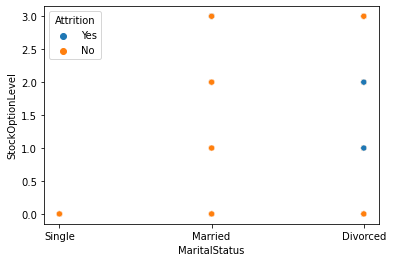

In [45]:
sns.scatterplot(df['MaritalStatus'],df['StockOptionLevel'],hue=df['Attrition'])

Divorced are more attrited with StockOptionLevel in 1,2

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

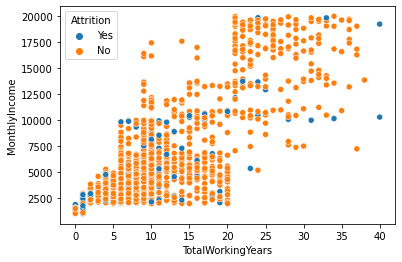

In [46]:
sns.scatterplot(df['TotalWorkingYears'],df['MonthlyIncome'],hue=df['Attrition'])

Employees with high MonthlyIncome and more TotalWorkingYears are less attrited as compared to the ones with low MonthlyIncome and less TotalWorkingYears.

<AxesSubplot:xlabel='BusinessTravel', ylabel='DistanceFromHome'>

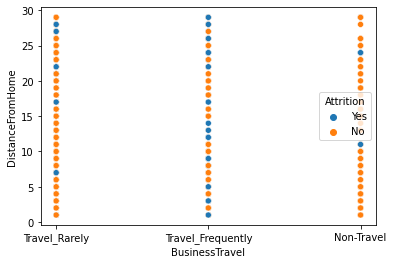

In [47]:
sns.scatterplot(df['BusinessTravel'],df['DistanceFromHome'],hue=df['Attrition'])

More attrition is of frequently travelling employees.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

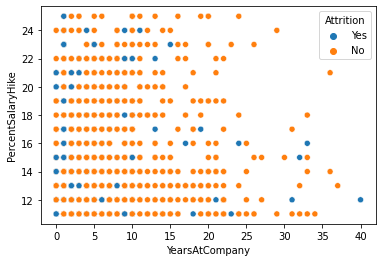

In [48]:
sns.scatterplot(df['YearsAtCompany'],df['PercentSalaryHike'],hue=df['Attrition'])

Employees comparatively more attrited are those who have completed less number of years in the company.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

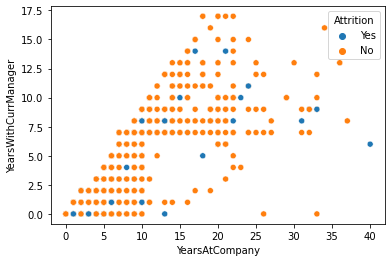

In [49]:
sns.scatterplot(df['YearsAtCompany'],df['YearsWithCurrManager'],hue=df['Attrition'])

Map shows positve correlation.

#### For categorical variables, outliers and skewness test will not give appropriate results.

### Dividing dataset in x and y

In [50]:
x=dff.drop('Attrition',axis=1)
x

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,Education,EnvironmentSatisfaction,...,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,1,0,7,2,1,41,2,2,...,0.693147,94.0,8.698514,19479.0,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759
1,1,1,1,1,6,1,0,49,1,3,...,2.197225,61.0,8.543056,24907.0,3.178054,2.397895,2.397895,2.079442,0.526589,2.079442
2,2,1,4,1,2,2,1,37,2,4,...,1.098612,92.0,7.645398,2396.0,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000
3,1,1,1,0,6,1,1,33,4,4,...,1.386294,56.0,7.975908,23159.0,2.484907,2.197225,2.197225,2.079442,0.869742,0.000000
4,2,1,3,1,2,1,0,27,1,1,...,1.098612,40.0,8.151622,16632.0,2.564949,1.945910,1.098612,1.098612,0.741276,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0,36,2,3,...,3.178054,41.0,7.852439,12290.0,2.890372,2.890372,1.791759,1.098612,0.000000,1.386294
1466,2,1,3,1,0,1,0,39,1,4,...,1.945910,42.0,9.209540,21457.0,2.772589,2.302585,2.079442,2.079442,0.526589,2.079442
1467,2,1,1,1,4,1,1,27,3,2,...,1.609438,87.0,8.723069,5174.0,3.044522,1.945910,1.945910,1.098612,0.000000,1.386294
1468,1,2,3,1,7,1,0,49,3,4,...,1.098612,63.0,8.592486,13243.0,2.708050,2.890372,2.302585,1.945910,0.000000,2.197225


In [51]:
y=dff['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [52]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (1387, 30)
Shape of y :  (1387,)


### Multicollinearity with VIF

In [53]:
# Imporing required libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,BusinessTravel,6.848669
1,Department,13.638939
2,EducationField,3.917579
3,Gender,2.571110
4,JobRole,8.456952
5,MaritalStatus,6.013970
6,OverTime,1.441728
7,Age,32.072866
8,Education,9.580196
9,EnvironmentSatisfaction,7.320857


PercentSalaryHike & MonthlyIncome have high multicollinearity so let's drop high multicolinear column.

In [55]:
# Drop PerformanceRating and check Multicollinearity again
x1=x.drop('PercentSalaryHike',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,BusinessTravel,6.848517
1,Department,13.627636
2,EducationField,3.917301
3,Gender,2.568639
4,JobRole,8.437952
5,MaritalStatus,6.000075
6,OverTime,1.440423
7,Age,31.931131
8,Education,9.577763
9,EnvironmentSatisfaction,7.316435


MonthlyIncome has high colinearity hence we can drop highly multicolinear one.

In [56]:
# Drop PerformanceRating and check Multicollinearity again
x2=x1.drop('MonthlyIncome',axis=1)
calc_vif(x2)

,Variables,VIF Factors
0,BusinessTravel,6.656084
1,Department,13.370050
2,EducationField,3.884833
3,Gender,2.533130
4,JobRole,8.434942
5,MaritalStatus,5.822886
6,OverTime,1.438632
7,Age,31.446422
8,Education,9.345441
9,EnvironmentSatisfaction,7.161842


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x3=sc.fit_transform(x2)
x3

array([[ 0.59312579,  1.40537338, -0.94081533, ...,  0.37256681,
        -1.06693129,  0.62864663],
       [-0.90535412, -0.49633675, -0.94081533, ...,  0.98090913,
         0.18442723,  0.99384363],
       [ 0.59312579, -0.49633675,  1.30515862, ..., -1.7105856 ,
        -1.06693129, -1.64589615],
       ...,
       [ 0.59312579, -0.49633675, -0.94081533, ..., -0.28861286,
        -1.06693129,  0.11393037],
       [-0.90535412,  1.40537338,  0.55650064, ...,  0.80807473,
        -1.06693129,  1.14336289],
       [ 0.59312579, -0.49633675,  0.55650064, ...,  0.08374422,
         0.18442723, -0.25126663]])

### Find best random state for Train-Test Split

In [58]:
# Finding out the best random value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=i)
    
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Best random state :  2  Accuracy(Training) :  88.04123711340206  Accuracy(Testing) :  88.2494004796163
Best random state :  7  Accuracy(Training) :  87.62886597938144  Accuracy(Testing) :  87.52997601918466
Best random state :  17  Accuracy(Training) :  88.45360824742268  Accuracy(Testing) :  87.52997601918466
Best random state :  18  Accuracy(Training) :  87.9381443298969  Accuracy(Testing) :  87.76978417266187
Best random state :  27  Accuracy(Training) :  88.45360824742268  Accuracy(Testing) :  87.76978417266187
Best random state :  32  Accuracy(Training) :  88.24742268041237  Accuracy(Testing) :  88.48920863309353
Best random state :  34  Accuracy(Training) :  87.9381443298969  Accuracy(Testing) :  87.76978417266187
Best random state :  46  Accuracy(Training) :  88.24742268041237  Accuracy(Testing) :  87.52997601918466
Best random state :  49  Accuracy(Training) :  87.52577319587628  Accuracy(Testing) :  88.48920863309353
Best random state :  51  Accuracy(Training) :  88.2474226804

Here, training & testing accuracies are almost same for random state=79. So, lets take 79 as our best random state.

In [60]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=79)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 28)
(417, 28)
(970,)
(417,)


In [61]:
y_train.value_counts()

0    805
1    165
Name: Attrition, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Class Imbalance

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [63]:
trainy.value_counts()

0    805
1    805
Name: Attrition, dtype: int64

All the values in training set y are balanced now.

### Finding the best algorithm

In [64]:
#Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [65]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rf=RandomForestClassifier()

In [66]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,knn,svc,rf]
svc_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svc :
        for j in svc_kernel :
            svc=SVC(kernel=j)
            svc.fit(trainx,trainy)
            pred=svc.predict(x_test)
            acc=accuracy_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svc1=SVC(kernel=j)
        print(svc1)
        svc1.fit(trainx,trainy)
        predtrain=svc1.predict(trainx)
        predtest=svc1.predict(x_test)
        acctrain=accuracy_score(trainy,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(trainx,trainy)
        predtrain=i.predict(trainx)
        predtest=i.predict(x_test)
        acctrain=accuracy_score(trainy,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  79.3167701863354  Accuracy(Test)  77.45803357314148  Mean absolute error :  0.22541966426858512
[[274  79]
 [ 15  49]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       353
           1       0.38      0.77      0.51        64

    accuracy                           0.77       417
   macro avg       0.67      0.77      0.68       417
weighted avg       0.86      0.77      0.80       417



DecisionTreeClassifier()
Accuracy(Training) :  100.0  Accuracy(Test)  78.41726618705036  Mean absolute error :  0.2158273381294964
[[299  54]
 [ 36  28]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       353
           1       0.34      0.44      0.38        64

    accuracy                           0.78       417
   macro avg       0.62      0.64      0.63       417
weighted avg       0.81      0.78      0.79       417



KNeighborsClassifier()
Acc

RandomForestClassifier has the highest accuracy but let's go for cross validation for all the models used.

In [67]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x1,y,cv=5).mean())

CV mean of  LogisticRegression()  is  0.8500532426044722
CV mean of  DecisionTreeClassifier()  is  0.7902111523777368
CV mean of  KNeighborsClassifier()  is  0.8190426719995845
CV mean of  SVC()  is  0.8348959821312626
CV mean of  RandomForestClassifier()  is  0.856522868347921


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 85% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [68]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [72]:
rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='log2',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x1,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8705035971223022  CV mean :  0.8543697893670623


In [73]:
# Using dfferent parameters for hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [75]:
rf=RandomForestClassifier(class_weight=None,criterion='gini',max_features='sqrt',n_estimators=100)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x1,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8776978417266187  CV mean :  0.8550788250266212


#### We are getting model accuracy as 87% and cv mean as 0.85 for both the parameter sets, this shows our model is performing good.

### AUC-ROC Curve

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(class_weight=None,criterion='gini',max_features='sqrt',n_estimators=100)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [77]:
pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
print(fpr,tpr,thresholds)

[0.         0.         0.00283286 0.00283286 0.00566572 0.00566572
 0.00849858 0.01416431 0.01416431 0.01416431 0.01983003 0.01983003
 0.02266289 0.02266289 0.02266289 0.02266289 0.02266289 0.03116147
 0.03399433 0.03966006 0.0509915  0.0509915  0.06232295 0.06232295
 0.07082153 0.07648725 0.08498584 0.101983   0.11331445 0.11614731
 0.11898017 0.14447592 0.15580737 0.17847025 0.18696884 0.20396601
 0.22946176 0.23512748 0.2776204  0.29745042 0.30878187 0.33994334
 0.35977337 0.38243626 0.41643059 0.44759207 0.49008499 0.52691218
 0.54674221 0.60906516 0.64872521 0.68271955 0.71954674 0.76770538
 0.81869688 0.84419263 0.898017   0.92351275 0.9490085  0.96600567
 0.98866856 1.        ] [0.       0.015625 0.03125  0.078125 0.078125 0.09375  0.109375 0.109375
 0.140625 0.1875   0.203125 0.21875  0.25     0.265625 0.296875 0.34375
 0.375    0.390625 0.390625 0.390625 0.421875 0.4375   0.453125 0.484375
 0.484375 0.5      0.53125  0.5625   0.578125 0.578125 0.609375 0.6875
 0.703125 0.73437

Calculating fpr,tpr,thresholds for selected model

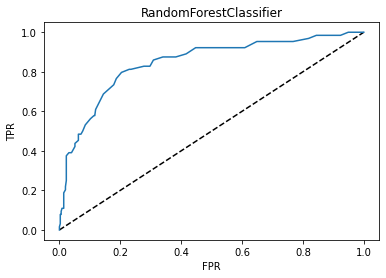

In [78]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [79]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.8776978417266187
ROC_AUC score :  0.8460295679886686


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [80]:
# Saved the model in .pkl file
import pickle
file='hranalytics.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion 

In [81]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8800959232613909

In [82]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(417, 28)
(417,)


In [85]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[10:40]

,Orignal,Predicted
10,0,0
11,0,0
12,0,0
13,1,1
14,0,0
15,0,0
16,0,0
17,0,0
18,0,0
19,1,1
